# Training data preparation

In this notebook, we explore the PharmGKB data and prepare it for training.

In [41]:
df = pd.read_csv(
    "../data/pharmgkb_processed/final_tables/pgkb_merged.csv", low_memory=False
)
df.head().transpose()

,0,1,2,3,4
cid,PA165950341,PA450379,PA450428,PA164712720,PA450626
chemical,ivacaftor,mercaptopurine,methotrexate,Drugs used in nicotine dependence,nicotine
smiles,CC(C)(C)C1=CC(=C(C=C1NC(=O)C2=CNC3=CC=CC=C3C2=...,C1=NC2=C(N1)C(=S)N=CN2,CN(CC1=CN=C2C(=N1)C(=NC(=N2)N)N)C3=CC=C(C=C3)C...,NaN,CN1CCCC1C2=CN=CC=C2
gid,PA109,PA134865839,PA134865839,PA31945,PA31945
gene,CFTR,SLCO1B1,SLCO1B1,OPRM1,OPRM1
ensembl_id,ENSG00000001626,ENSG00000134538,ENSG00000134538,ENSG00000112038,ENSG00000112038
vid,PA166157516,PA166154579,PA166154579,PA166156991,PA166156991
variant,rs75527207,rs4149056,rs4149056,rs1799971,rs1799971
evidence,1A,3,3,4,4
significance,NaN,NaN,NaN,NaN,NaN


In [55]:
def summary_of_subtable(df):
    df = df[df["gene"].notnull()]
    df = df[df["significance"] != -1]
    print("chemical", sorted(set(df["chemical"])))
    print("gene", sorted(set(df["gene"])))
    print("counts", len(df))
    df1 = df[df["gene"]=="ABCC4"]
    return df1


df1=summary_of_subtable(df[df["cid"] == "PA450379"])

chemical ['mercaptopurine']
gene ['ABCC4', 'APEX1', 'C18orf56', 'CNNM2', 'COMT', 'CPT1A', 'CYP2A7', 'DDRGK1', 'DROSHA', 'FOLH1', 'FTO', 'GATA3', 'GNMT', 'GSTP1', 'HLA-B', 'HLA-DQA1', 'HLA-DRB1', 'IGHMBP2', 'IMPDH1', 'ITPA', 'MTHFR', 'NT5C2', 'NUDT15', 'OSGEP', 'PACSIN2', 'PNPLA3', 'SLC19A1', 'SLC22A1', 'SLC28A2', 'SLC28A3', 'SLC29A1', 'SLCO1B1', 'TPMT', 'TYMS', 'UGT1A1', 'XDH']
counts 3331


In [56]:
df1

,cid,chemical,smiles,gid,gene,ensembl_id,vid,variant,evidence,significance,phenotype,did,disease,biogroup,caid,vaid
6732,PA450379,mercaptopurine,C1=NC2=C(N1)C(=S)N=CN2,PA397,ABCC4,ENSG00000125257,PA166154714,rs3765534,3,NaN,Toxicity,PA446116,Inflammatory Bowel Diseases,NaN,1.448100e+09,NaN
49839,PA450379,mercaptopurine,C1=NC2=C(N1)C(=S)N=CN2,PA397,ABCC4,ENSG00000125257,PA166154714,rs3765534,3,NaN,Toxicity,PA446116,Inflammatory Bowel Diseases,NaN,NaN,NaN
93870,PA450379,mercaptopurine,C1=NC2=C(N1)C(=S)N=CN2,PA397,ABCC4,ENSG00000125257,PA166154709,rs2274407,NaN,1.0,Dosage,NaN,NaN,East Asian,NaN,1.448603e+09
208024,PA450379,mercaptopurine,C1=NC2=C(N1)C(=S)N=CN2,PA397,ABCC4,ENSG00000125257,PA166154714,rs3765534,NaN,1.0,Toxicity,NaN,NaN,East Asian,NaN,9.815026e+08
208576,PA450379,mercaptopurine,C1=NC2=C(N1)C(=S)N=CN2,PA397,ABCC4,ENSG00000125257,PA166154709,rs2274407,NaN,1.0,Toxicity,NaN,NaN,European,NaN,7.691736e+08
208579,PA450379,mercaptopurine,C1=NC2=C(N1)C(=S)N=CN2,PA397,ABCC4,ENSG00000125257,PA166154709,rs2274407,NaN,1.0,Efficacy,NaN,NaN,European,NaN,7.691736e+08
213386,PA450379,mercaptopurine,C1=NC2=C(N1)C(=S)N=CN2,PA397,ABCC4,ENSG00000125257,PA166154753,rs17268122,NaN,0.0,Metabolism/PK,NaN,NaN,European,NaN,1.184467e+09
216337,PA450379,mercaptopurine,C1=NC2=C(N1)C(=S)N=CN2,PA397,ABCC4,ENSG00000125257,PA166154714,rs3765534,NaN,1.0,Toxicity,NaN,NaN,East Asian,NaN,1.449749e+09
217496,PA450379,mercaptopurine,C1=NC2=C(N1)C(=S)N=CN2,PA397,ABCC4,ENSG00000125257,NaN,ABCC4 deficiency,NaN,1.0,Toxicity,NaN,NaN,Unknown,NaN,1.448634e+09
218303,PA450379,mercaptopurine,C1=NC2=C(N1)C(=S)N=CN2,PA397,ABCC4,ENSG00000125257,PA166154709,rs2274407,NaN,1.0,Toxicity,NaN,NaN,Near Eastern,NaN,1.447681e+09


In [31]:
# Imports
import pandas as pd
import os
from tqdm import tqdm
import random
from rdkit import Chem
from rdkit import RDLogger
import numpy as np
import datetime
import string
import json
import warnings

RDLogger.DisableLog("rdApp.*")

import sys

sys.path.append("../src")

# Read main processed PharmGKB table
df = pd.read_csv(
    "../data/pharmgkb_processed/final_tables/pgkb_merged.csv", low_memory=False
)

print(df.shape)

def table_statistics(df):
    pairs = set([tuple(x) for x in df[["cid", "gid"]].values])
    triplets = set([tuple(x) for x in df[["cid", "vid", "gid"]].values])
    print("Compounds: ", len(set(df["cid"])))
    print("Genes:     ", len(set(df["gid"])))
    print("Variants:  ", len(set(df["vid"])))
    print("Pairs:     ", len(pairs))
    print("Triplets:  ", len(triplets))


table_statistics(df)

(345420, 16)
Compounds:  1190
Genes:      1949
Variants:   6986
Pairs:      9790
Triplets:   49958


In [4]:
triplets = set([tuple(x) for x in df[["cid", "vid", "gid"]].values])

In [24]:
# Focus genes are ADME genes provided by H3D
focus_genes = pd.read_csv("../data/of_interest/adme_gene_list.tsv", sep="\t")
focus_genes = focus_genes[focus_genes["PharmGKB ID"].notnull()]

# Focus compounds are antimalarial and antituberculosis drugs provided by H3D
focus_compounds = pd.read_csv(
    "../data/of_interest/curated_drugs_for_gradient.tsv", sep="\t"
)
inchikeys = []
for smi in focus_compounds["SMILES"].tolist():
    mol = Chem.MolFromSmiles(smi)
    inchi = Chem.rdinchi.MolToInchi(mol)[0]
    inchikey = Chem.rdinchi.InchiToInchiKey(inchi)
    inchikeys += [inchikey]
focus_compounds["inchikey"] = inchikeys

In [25]:
df = df[df["gid"].isin(focus_genes["PharmGKB ID"].tolist())]
table_statistics(df)

Compounds:  735
Genes:      170
Variants:   1923
Pairs:      2928
Triplets:   34145


In [32]:
# Map compounds to InChIKeys
cid2smi = {}
for r in df[["cid", "smiles"]].values:
    if str(r[1]) != "nan":
        cid2smi[r[0]] = r[1]
    else:
        print(r[0], r[1])
cid2key = {}
for k, v in tqdm(cid2smi.items()):
    mol = Chem.MolFromSmiles(v)
    inchi = Chem.rdinchi.MolToInchi(mol)[0]
    inchikey = Chem.rdinchi.InchiToInchiKey(inchi)
    cid2key[k] = inchikey

# Map genes to UniProt ACs
hp = pd.read_csv("../data/other/human_proteome_with_genenames.tab", sep="\t")
cols = list(hp.columns)
hp = hp[(hp[cols[0]].notnull()) & (hp[cols[2]].notnull())]
g2p = {}
up = pd.read_csv(
    os.path.join("..", "data", "other", "human_proteome_with_genenames.tab"),
    sep="\t",
)
for v in up[
    ["Entry", "Gene names", "Gene names  (primary )", "Gene names  (synonym )"]
].values:
    p = v[0]
    g = []
    for x in v[1:]:
        x = str(x)
        if x == "nan":
            continue
        for y in x.split(" "):
            g += [y]
    for x in g:
        g2p[x] = p

gid2key = {}
for r in df[["gid", "gene"]].values:
    if str(r[0]) == "nan" or str(r[1]) == "nan":
        continue
    if r[1] not in g2p:
        continue
    gid2key[r[0]] = g2p[r[1]]

PA164712720 nan
PA133950441 nan
PA452618 nan
PA133950441 nan
PA150481189 nan
PA164713366 nan
PA452229 nan
PA452229 nan
PA452618 nan
PA452618 nan
PA452618 nan
PA452618 nan
PA164713176 nan
PA164713176 nan
PA452618 nan
PA166179660 nan
PA164712445 nan
PA164712446 nan
PA151249535 nan
PA134521193 nan
PA164712535 nan
PA452233 nan
PA10040 nan
PA452233 nan
PA452233 nan
PA130232992 nan
PA164712720 nan
PA143485705 nan
PA143485705 nan
PA10390 nan
PA164713366 nan
PA10004 nan
PA10004 nan
PA164749390 nan
PA164784024 nan
PA164749390 nan
PA164784024 nan
PA164749390 nan
PA164784024 nan
PA164713176 nan
PA166122986 nan
PA166048654 nan
PA164713366 nan
PA166048654 nan
PA164713366 nan
PA166048654 nan
PA164713366 nan
PA166048654 nan
PA164713366 nan
PA164713366 nan
PA164713176 nan
PA164713176 nan
PA164713176 nan
PA164713176 nan
PA164713176 nan
PA164713176 nan
PA133950441 nan
PA451743 nan
PA451743 nan
PA451743 nan
PA451743 nan
PA164712462 nan
PA451743 nan
PA142650384 nan
PA452618 nan
PA452618 nan
PA452618 nan
P

100%|██████████| 904/904 [00:00<00:00, 3406.73it/s]


In [33]:
df.shape

(345420, 16)

In [37]:
df.value_counts("phenotype")

phenotype
Metabolism/PK    95491
Toxicity         61574
Efficacy         43421
Dosage           28673
Other            10703
PD                 170
Name: count, dtype: int64

In [34]:
# Filter to only consider PK relationships
# df = df[df["phenotype"].isin(["Metabolism/PK"])]#, "Toxicity", "Dosage"])]
df = df[df["significance"] != -1]
df = df[df["evidence"] != "4"]

# Build a unique set of triplets
triplets = set()
for r in df[["cid", "chemical", "gid", "gene", "vid", "variant"]].values:
    r = tuple(r)
    if r[0] not in cid2key:
        ckey = None
    else:
        ckey = cid2key[r[0]]
    if r[2] not in gid2key:
        gkey = None
    else:
        gkey = gid2key[r[2]]
    if gkey is None or ckey is None:
        continue
    triplets.update([(ckey, r[0], r[1], gkey, r[3], r[2], r[5], r[4])])
triplets = list(triplets)
triplets = list(set(triplets))

dt = pd.DataFrame(
    triplets,
    columns=[
        "inchikey",
        "cid",
        "chemical",
        "uniprot_ac",
        "gene",
        "gid",
        "variant",
        "vid",
    ],
)
table_statistics(dt)

Compounds:  859
Genes:      1328
Variants:   3960
Pairs:      5686
Triplets:   32668


In [35]:
dt

,inchikey,cid,chemical,uniprot_ac,gene,gid,variant,vid
0,UEJJHQNACJXSKW-UHFFFAOYSA-N,PA451644,thalidomide,Q03181,PPARD,PA33557,rs1883322,PA166157003
1,JWPGJSVJDAJRLW-UHFFFAOYSA-N,PA452616,debrisoquine,P10635,CYP2D6,PA128,rs267608276,PA166169615
2,CGMJQQJSWIRRRL-UHFFFAOYSA-N,PA166180939,phenazepam,P33261,CYP2C19,PA124,rs12248560,PA166154147
3,JLKIGFTWXXRPMT-UHFFFAOYSA-N,PA451544,sulfamethoxazole,P11413,G6PD,PA28469,NC_000023.11:g.154532688T>C,PA166287071
4,USSIQXCVUWKGNF-UHFFFAOYSA-N,PA166178554,(S)-methadone,P10635,CYP2D6,PA128,rs35742686,PA166156167
...,...,...,...,...,...,...,...,...
32897,RYMZZMVNJRMUDD-HGQWONQESA-N,PA451363,simvastatin,P10635,CYP2D6,PA128,rs949717872,PA166182980
32898,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,PA448497,aspirin,P08519,LPA,PA30432,rs3798220,PA166157081
32899,VVIAGPKUTFNRDU-ABLWVSNPSA-N,PA450198,leucovorin,Q6UVK1,CSPG4,PA26963,rs1127648,PA166154859
32900,FBOZXECLQNJBKD-ZDUSSCGKSA-N,PA450428,methotrexate,Q9NSA0,SLC22A11,PA38295,rs11231809,PA166154454


In [38]:
from samplers import PairPositiveNegativeSampler

ds = PairPositiveNegativeSampler(dt, 10).sample()

In [39]:
from splitters import RandomPairSplitter

ds_tr, ds_te = RandomPairSplitter().split(ds)

In [42]:
ds_tr.shape

(50038, 7)

In [40]:
from compound_structures import CompoundStructureEmbedding
from protein_sequences import ProteinSequenceEmbedding
from bioteque import BiotequeGeneEmbedding

bge = BiotequeGeneEmbedding()
pse = ProteinSequenceEmbedding()
cse = CompoundStructureEmbedding()

cemb_list = []
for x in cse.available():
    cemb_list += [(x, CompoundStructureEmbedding(x).get())]

pemb_list = []
for x in pse.available():
    pemb_list += [(x, ProteinSequenceEmbedding(x).get())]

for x in bge.available().values:
    pemb_list += [(x, BiotequeGeneEmbedding(x[0], x[1]).get())]

In [41]:
from bimodal_model import EnsembleBimodalStackedModel

model = EnsembleBimodalStackedModel(cemb_list[:1], pemb_list[:1])
model.fit(ds_tr)
model.evaluate(ds_te)
model_folder = model.model_folder
model = load_ensemble_bimodal_stacked_model(model_folder)
df = model.predict(ds_te)

Fitting: ersilia---esm1b
ersilia---esm1b 10904 0.6768487510049374
{
    "ersilia---esm1b": {
        "auroc": 0.6768487510049374,
        "n_eval": 10904
    },
    "average": {
        "auroc": 0.6768487510049374,
        "n_eval": 10904
    },
    "weighted_average": {
        "auroc": 0.6768487510049374,
        "n_eval": 10904
    }
}


In [33]:
df

,inchikey,cid,chemical,uniprot_ac,gene,gid,y,y_hat
0,OEKWJQXRCDYSHL-FNOIDJSQSA-N,PA165374673,ticagrelor,P11509,CYP2A6,PA121,0,0.160000
1,NCDNCNXCDXHOMX-XGKFQTDJSA-N,PA451260,ritonavir,P05177,CYP1A2,PA27093,0,0.050000
2,WINHZLLDWRZWRT-ATVHPVEESA-N,PA162372840,sunitinib,P20813,CYP2B6,PA123,0,0.060000
3,BCEHBSKCWLPMDN-MGPLVRAMSA-N,PA10233,voriconazole,P11712,CYP2C9,PA126,1,0.336417
4,YASAKCUCGLMORW-UHFFFAOYSA-N,PA451283,rosiglitazone,O75469,NR1I2,PA378,0,0.040000
...,...,...,...,...,...,...,...,...
1651,OEKWJQXRCDYSHL-FNOIDJSQSA-N,PA165374673,ticagrelor,Q6N069,NAT2,PA18,0,0.130000
1652,RCINICONZNJXQF-MZXODVADSA-N,PA450761,paclitaxel,Q9HAW9,UGT1A8,PA37183,0,0.010000
1653,PMATZTZNYRCHOR-KMSBSJHKSA-N,PA449167,cyclosporine,P33527,ABCC1,PA244,0,NaN
1654,KTUFNOKKBVMGRW-UHFFFAOYSA-N,PA10804,imatinib,P19224,UGT1A6,PA37181,0,0.040000


In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(
    df[df["y_hat"].notnull()]["y"], df[df["y_hat"].notnull()]["y_hat"]
)

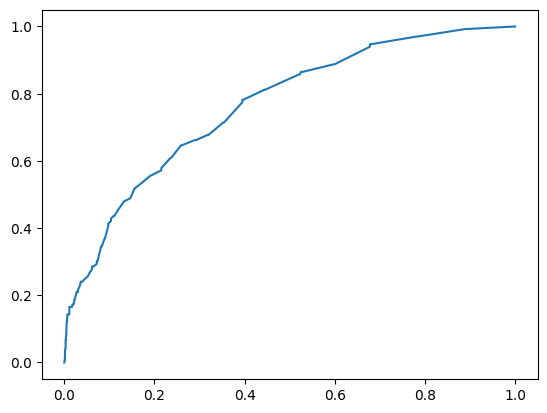

In [32]:
plt.plot(fpr, tpr)